In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)


In [16]:
print(titanic.head())
print(titanic.describe())
print(titanic.info())


   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.

In [20]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)

print("Missing values before cleaning:")
print(titanic.isnull().sum())

titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

if 'Embarked' in titanic.columns:
    titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
else:
    print("'Embarked' column not found in the dataset.")

columns_to_drop = ['Cabin', 'Ticket']
columns_present = [col for col in columns_to_drop if col in titanic.columns]

if columns_present:
    # Drop unnecessary columns like 'Cabin' and 'Ticket'
    titanic.drop(columns_present, axis=1, inplace=True)
    print(f"Dropped columns: {columns_present}")
else:
    print(f"Columns to drop not found in the dataset: {columns_to_drop}")

print("\nMissing values after cleaning:")
print(titanic.isnull().sum())


Missing values before cleaning:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64
'Embarked' column not found in the dataset.
Columns to drop not found in the dataset: ['Cabin', 'Ticket']

Missing values after cleaning:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


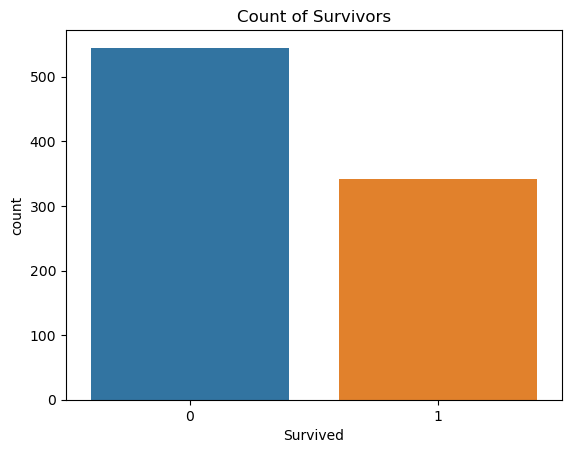

In [28]:
sns.countplot(x='Survived', data=titanic)
plt.title('Count of Survivors')
plt.show()



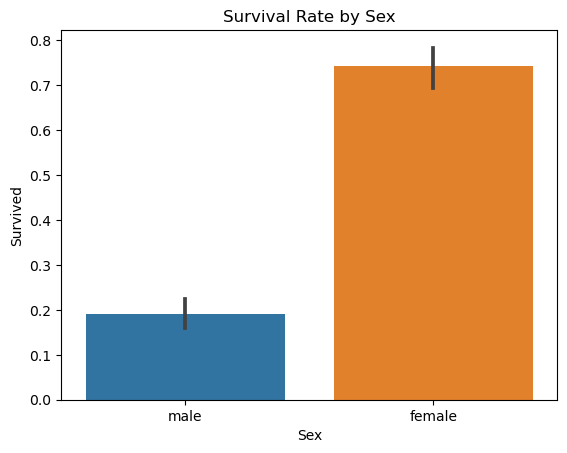

In [29]:
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.show()




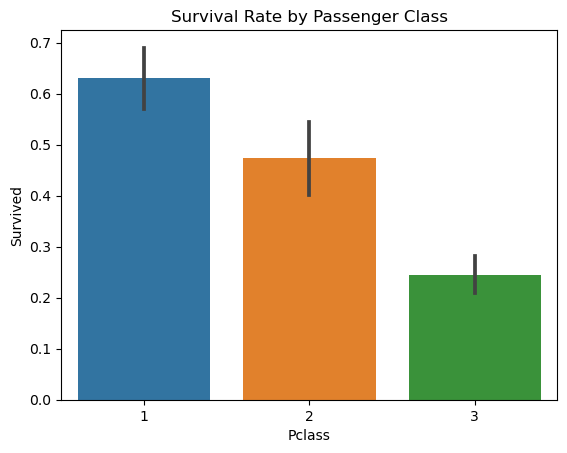

In [30]:
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


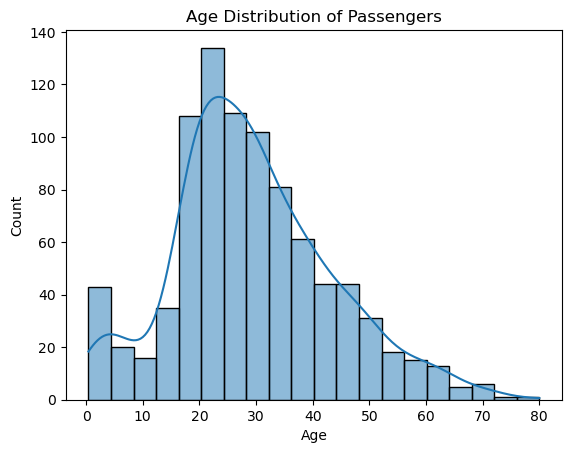

In [31]:
sns.histplot(titanic['Age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


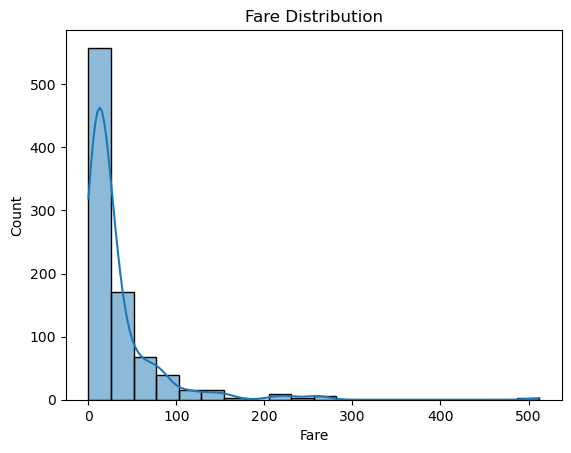

In [32]:
sns.histplot(titanic['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')
plt.show()

Missing values before cleaning:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64
'Embarked' column not found in the dataset.
Columns to drop not found in the dataset: ['Cabin', 'Ticket']

Missing values after cleaning:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


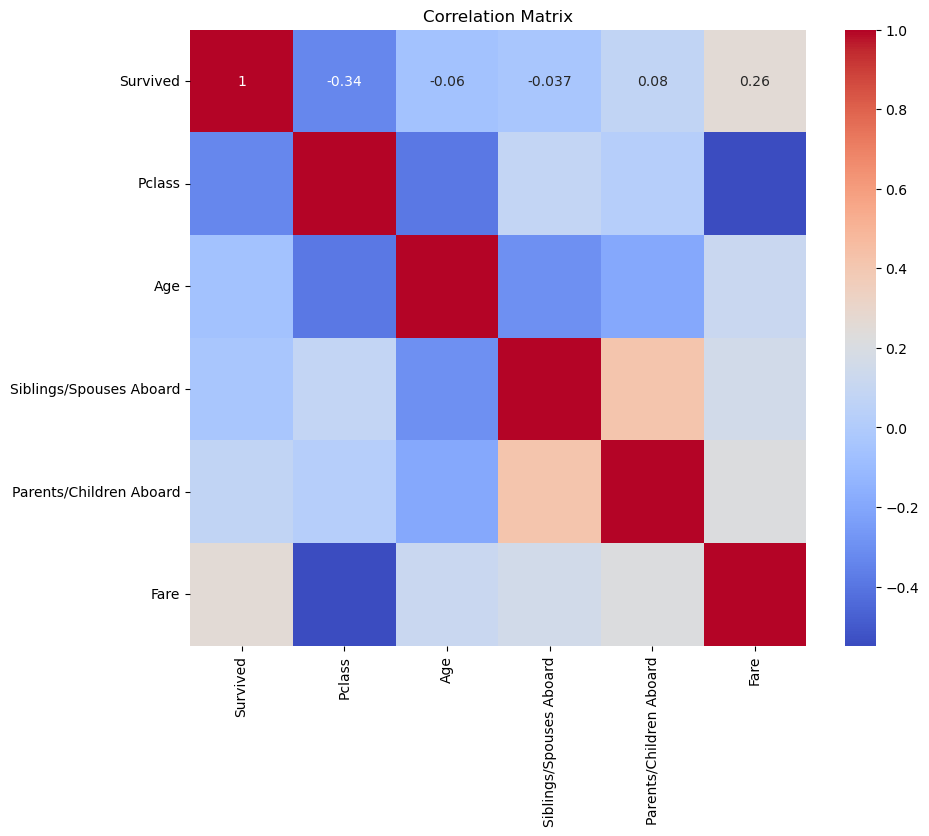

In [35]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)
print("Missing values before cleaning:")
print(titanic.isnull().sum())

titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

if 'Embarked' in titanic.columns:
    titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
else:
    print("'Embarked' column not found in the dataset.")

columns_to_drop = ['Cabin', 'Ticket']
columns_present = [col for col in columns_to_drop if col in titanic.columns]

if columns_present:
    titanic.drop(columns_present, axis=1, inplace=True)
    print(f"Dropped columns: {columns_present}")
else:
    print(f"Columns to drop not found in the dataset: {columns_to_drop}")

print("\nMissing values after cleaning:")
print(titanic.isnull().sum())

numeric_columns = titanic.select_dtypes(include=['float64', 'int64']).columns
titanic_numeric = titanic[numeric_columns]

correlation_matrix = titanic_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
